In [1]:
 #importing libraries 
    
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset

df=pd.read_csv(r"D:\Data Science\Dataset\Medical_Cost_Insurance\medicine.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#To find null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA

In [4]:
#Age analysis

In [5]:
df['age_bin']=pd.cut(df['age'],bins=[0,18,35,60,80],
                     labels=['Teen','Young Adult','Middle Adult','Old Adult'],include_lowest=True)
df['bmi_bin']=pd.cut(df['bmi'],bins=[0,18.5,24.9,29.9,100],
                     labels=['Underweight','Normal','Overweight','Obese'],include_lowest=True)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_bin,bmi_bin
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Teen,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight


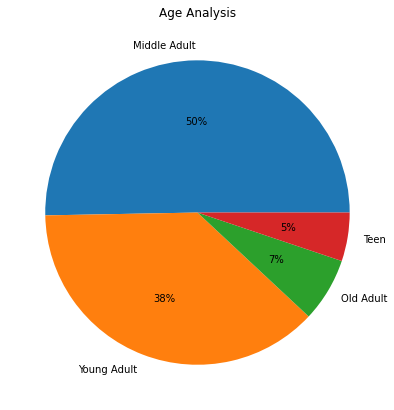

In [7]:
data=df['age_bin'].value_counts()
plt.figure(figsize=(15,7))
plt.pie(data,labels=['Middle Adult','Young Adult','Old Adult','Teen'],autopct='%1.0f%%')
plt.title("Age Analysis")
plt.show()

The above pie chart shows that Middle Adult spend more on medicine than others.

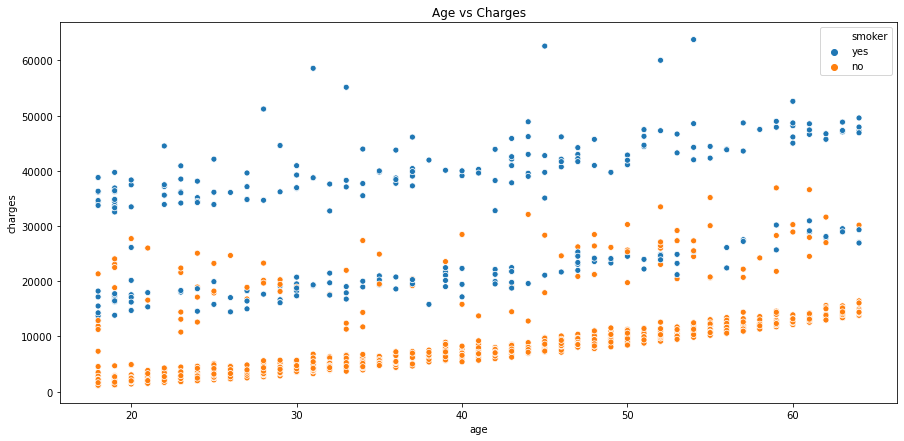

In [8]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.title("Age vs Charges")
plt.show()

The above scatter plot shows the one who smokes spend high on medicine.

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#mean and median charges of ages 

T_charges_mean=df['charges'].loc[df['age_bin']=='Teen'].mean()
YA_charges_mean=df['charges'].loc[df['age_bin']=='Young Adult'].mean()
MA_charges_mean=df['charges'].loc[df['age_bin']=='Middle Adult'].mean()
OA_charges_mean=df['charges'].loc[df['age_bin']=='Old Adult'].mean()

T_charges_median=df['charges'].loc[df['age_bin']=='Teen'].median()
YA_charges_median=df['charges'].loc[df['age_bin']=='Young Adult'].median()
MA_charges_median=df['charges'].loc[df['age_bin']=='Middle Adult'].median()
OA_charges_median=df['charges'].loc[df['age_bin']=='Old Adult'].median()

In [11]:
x=['Teen','Young Adult','Middle Adult','Old Adult']
y=[T_charges_mean,YA_charges_mean,MA_charges_mean,OA_charges_mean]

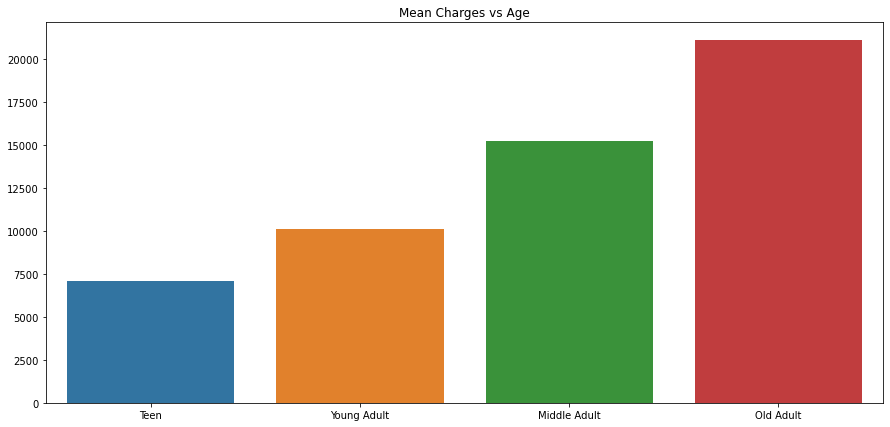

In [12]:
plt.figure(figsize=(15,7))
sns.barplot(x=x,y=y)
plt.title("Mean Charges vs Age")
plt.show()

Mean Charges on medicine by Old Adult is high than others.

In [13]:
x=['Teen','Young Adult','Middle Adult','Old Adult']
y=[T_charges_median,YA_charges_median,MA_charges_median,OA_charges_median]

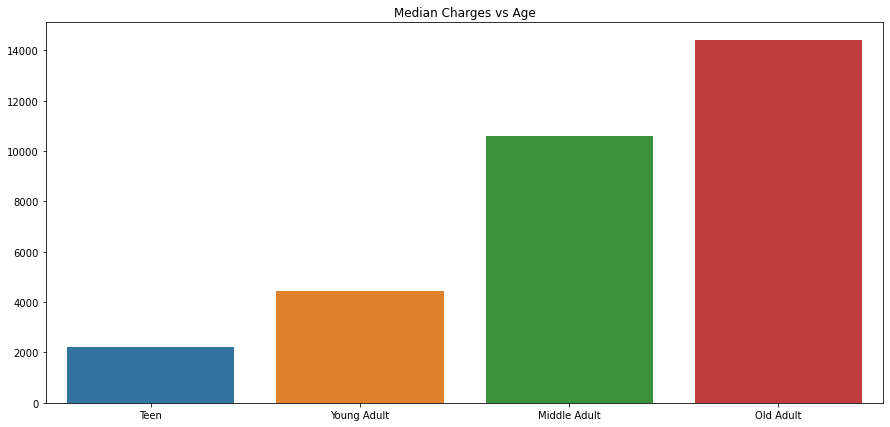

In [14]:
plt.figure(figsize=(15,7))
sns.barplot(x=x,y=y)
plt.title('Median Charges vs Age')
plt.show()

Median Charges on medicine by Old Adult is high than others.

In [15]:
#BMI Analysis

In [16]:
data=df['bmi_bin'].value_counts()
data

Obese          716
Overweight     380
Normal         221
Underweight     21
Name: bmi_bin, dtype: int64

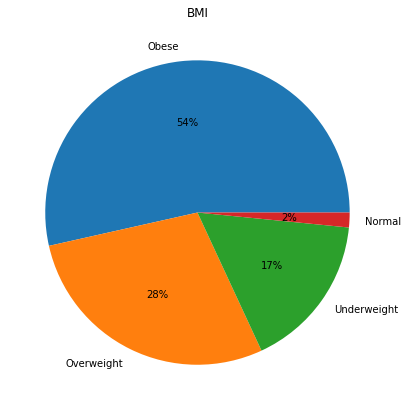

In [17]:
plt.figure(figsize=(15,7))
plt.pie(data,labels=['Obese','Overweight','Underweight','Normal'],autopct='%1.0f%%')
plt.title("BMI")
plt.show()

The above pie chart shows that Obese people spend more on medicine and Normal people spend least. 

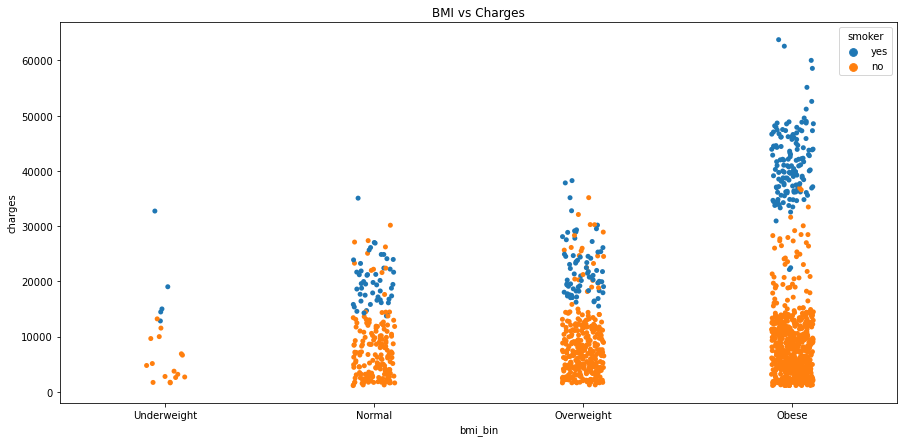

In [18]:
plt.figure(figsize=(15,7))
sns.stripplot(x='bmi_bin',y='charges',hue='smoker',data=df)
plt.title("BMI vs Charges")
plt.show()

Person who is a smoker and has obese condition spend more on medicine.

In [19]:
#looking closer in Obese condition

In [20]:
smoke_obese_charges = df["charges"].loc[(df["bmi_bin"] == "Obese") & (df["smoker"] == "yes")].values
nosmoke_obese_charges = df["charges"].loc[(df["bmi_bin"] == "Obese") & (df["smoker"] == "no")].values

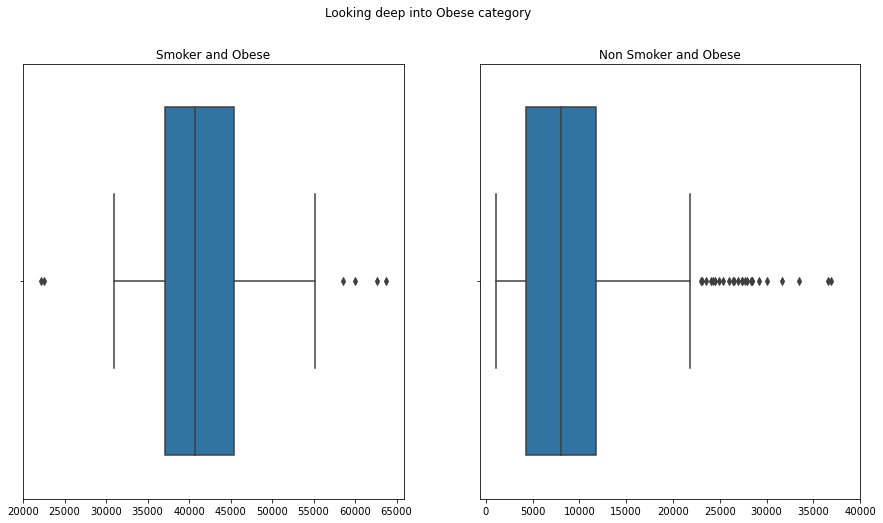

<Figure size 1440x864 with 0 Axes>

In [21]:
fig, axs = plt.subplots(ncols=2,figsize=(15,8))
fig.suptitle('Looking deep into Obese category')
plt.figure(figsize=(20,12))

sns.boxplot(smoke_obese_charges,ax=axs[0])
axs[0].title.set_text('Smoker and Obese')
axs[0].set_xticks(np.arange(20000,70000,5000))

sns.boxplot(nosmoke_obese_charges,ax=axs[1])
axs[1].title.set_text('Non Smoker and Obese')
axs[1].set_xticks(np.arange(0,45000,5000))

plt.show()

Person who is a smoker and has obese condition has spent a maximum of 63000 approx. and a minimum of 22000 approx.
Person who is a non-smoker and has obese condition has spent a maximum of 36000 approx. and a minimum of 2500 approx.

In [22]:
#Regional analysis

In [23]:
region_smoker = pd.crosstab(df['smoker'], df['region'])
region_smoker

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


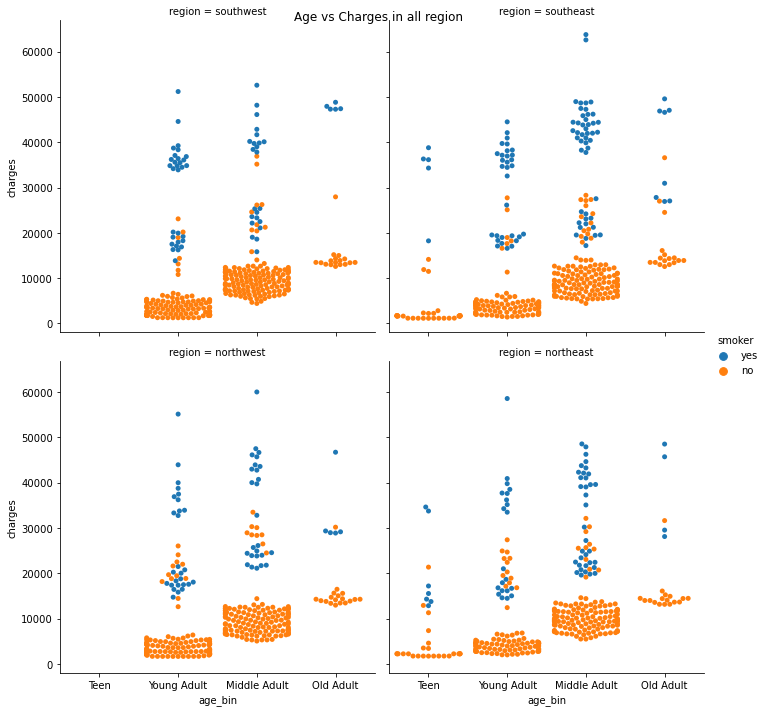

<Figure size 1440x864 with 0 Axes>

In [24]:
sns.catplot(x="age_bin", y="charges", hue="smoker", col="region", kind="swarm", data=df, col_wrap=2)
plt.suptitle("Age vs Charges in all region")
plt.figure(figsize=(20,12))
plt.show()

No Teen in SouthWest and NorthWest spend for medicine.
Smokers in all regions spend high on medicine than non smokers.

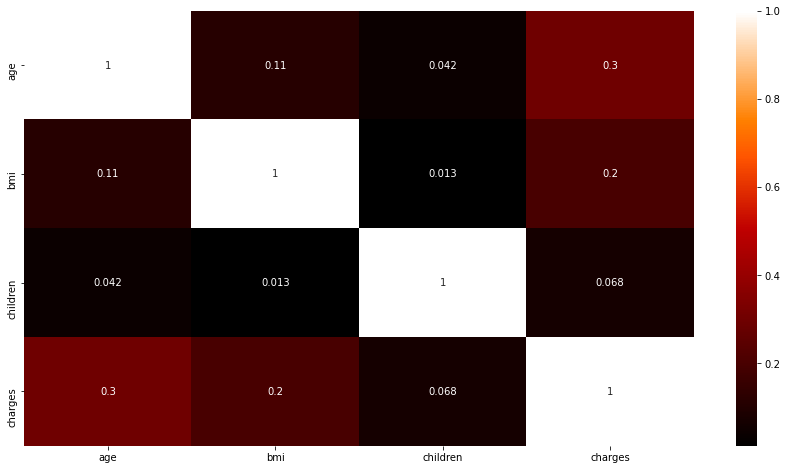

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='gist_heat',annot=True)
plt.show()

The above Heatmap shows that Age and BMI has correlation with the medicial expenditure(charges).